In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df= pd.read_csv('C:\\Users\\MIA\\Desktop\\practice1\\FastagFraudDetection.csv')

In [3]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Output
0,1,01-06-23 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,1
1,2,01-07-23 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,1
2,3,01-08-23 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,0
3,4,01-09-23 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,1
4,5,01-10-23 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,01-01-23 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,0
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,0
4997,4998,02-05-23 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,0
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,0


In [4]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Output
0,1,01-06-23 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,1
1,2,01-07-23 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,1
2,3,01-08-23 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,0
3,4,01-09-23 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,1
4,5,01-10-23 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,1


In [5]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Output
4995,4996,01-01-23 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,0
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,0
4997,4998,02-05-23 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,0
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,0
4999,5000,03-10-23 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud,1


In [6]:
df.sample(4)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Output
3516,3517,08-04-23 4:32,Car,FTG-870-POI-210,A-101,Express,Small,100,100,"12.84197701525119, 77.67547528176169",55,KA89AA1234,Not Fraud,0
660,661,1/26/2023 22:50,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",59,AP19FF1122,Not Fraud,0
681,682,2/16/2023 9:00,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",42,AP40AA3344,Not Fraud,0
2229,2230,2/17/2023 14:15,Truck,FTG-189-QAZ-543,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",94,AP67IJ7890,Not Fraud,0


In [7]:
#Numerical Summary Statistics:
# count: The number of non-missing values.
# mean: The average value.
# std: The standard deviation, indicating the spread of the values.
# min: The minimum value.
# 25%: The 25th percentile value (first quartile).
# 50%: The median value (second quartile).
# 75%: The 75th percentile value (third quartile).
# max: The maximum value.
# median: The median value, explicitly added for clarity.
# mode: The most frequently occurring value.
# missing_values: The count of missing values in each column.


In [8]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Output
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200,0.196600
std,1443.520003,112.44995,106.480996,16.597547,0.397467
min,1.000000,0.00000,0.000000,10.000000,0.000000
25%,1250.750000,100.00000,90.000000,54.000000,0.000000
50%,2500.500000,130.00000,120.000000,67.000000,0.000000
75%,3750.250000,290.00000,160.000000,82.000000,0.000000
max,5000.000000,350.00000,350.000000,118.000000,1.000000


In [9]:
# The select_dtypes() method returns a new DataFrame that includes/excludes columns of the specified dtype(s).
df.select_dtypes('number').mean()

Transaction_ID        2500.5000
Transaction_Amount     161.0620
Amount_paid            141.2610
Vehicle_Speed           67.8512
Output                   0.1966
dtype: float64

In [10]:
df.select_dtypes('number').median()

Transaction_ID        2500.5
Transaction_Amount     130.0
Amount_paid            120.0
Vehicle_Speed           67.0
Output                   0.0
dtype: float64

In [11]:
df.select_dtypes('number').mode().iloc[0]

Transaction_ID         1.0
Transaction_Amount     0.0
Amount_paid            0.0
Vehicle_Speed         55.0
Output                 0.0
Name: 0, dtype: float64

In [12]:
# The function dataframe. isnull(). sum() returns the number of missing values in the dataset.
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
Output                     0
dtype: int64

In [13]:
df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
Output                   0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
 13  Output                 5000 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [16]:
df.drop_duplicates(inplace= True)

In [17]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Output
0,1,01-06-23 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,1
1,2,01-07-23 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,1
2,3,01-08-23 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,0
3,4,01-09-23 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,1
4,5,01-10-23 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,01-01-23 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud,0
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud,0
4997,4998,02-05-23 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud,0
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud,0


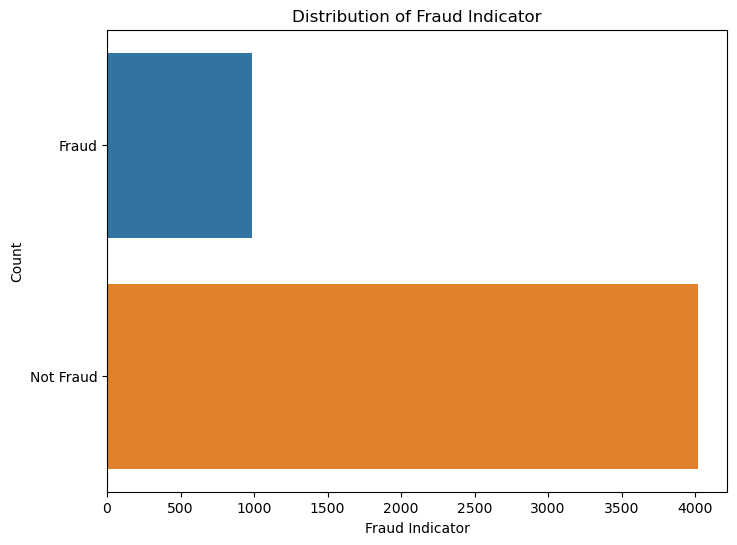

In [18]:
#Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Fraud_indicator')
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


c:\Users\MIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


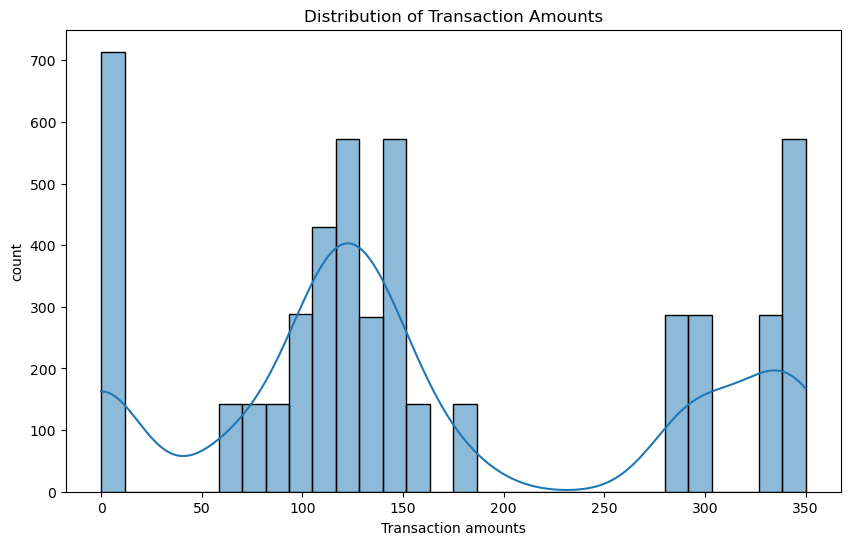

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'],bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction amounts')
plt.ylabel('count')
plt.show()

c:\Users\MIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


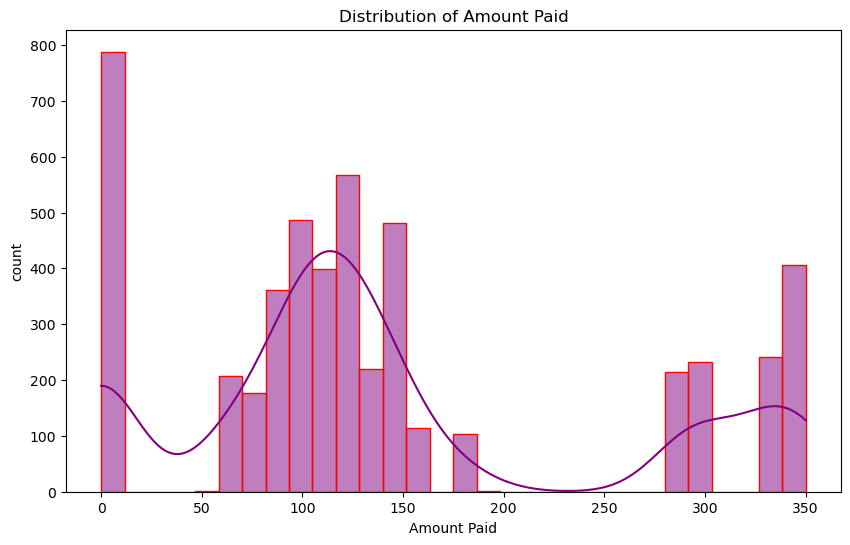

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount_paid'],bins=30, kde=True, color="purple", edgecolor='red')
plt.title('Distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('count')
plt.show()